# 1. Import the necessary libraries

In [197]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy as scipy

# 2. Read the data as a data frame

In [198]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 3. Perform basic EDA which should include the following and print out your insights at every step.


a. Shape of the data

In [199]:
df.shape

(1338, 7)

INSIGHTS: In total,1338 people are Insured

b. Data type of each attribute

In [200]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

INSIGHTS
1.Categorical variables - sex,smoker,region 
2.Quantitative variables - age,bmi,children,charges

c. Checking the presence of missing values

In [201]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

INSIGHTS: No records with invalid data/ No Missing values

d. 5 point summary of numerical attributes

In [202]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


INSIGHTS: 

1.Around 75% people insured have a higher BMI than ideal BMI of 24.9(deduced from 25th percentile of BMI). Considering their higher medical risk associated with high BMI, it is possible that the high BMI can be one of the factors they have opted for an insurance.



e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

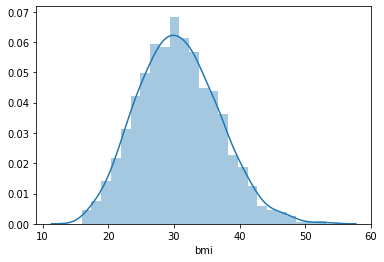

In [203]:
sns.distplot(df["bmi"])

INSIGHTS:
BMI distribution represents normal distribution with a mean of around 30 

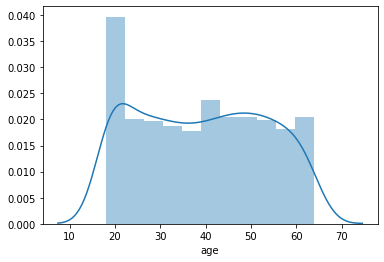

In [204]:
sns.distplot(df["age"])

INSIGHTS:
Standard deviation of Age distribution is more, since the distribution plot is spread widely with little skewness.

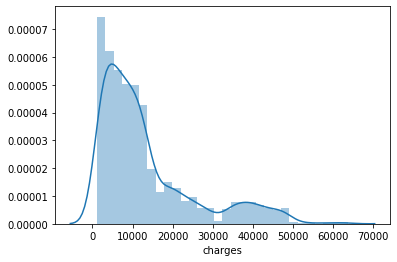

In [205]:
sns.distplot(df["charges"])

INSIGHTS:
Most of the charges lie between 0 to 10000. However a huge number of samples also lie betwenn 20000 to 50000 approximately. This closely resembles Right Skewed plot

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [206]:
df['bmi'].skew()

0.2840471105987448

In [207]:
df['age'].skew()

0.05567251565299186

In [208]:
df['charges'].skew()

1.5158796580240388

INSIGHTS:
    
1. Charges have more skewness as compared to bmi and age

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges’ columns

In [210]:
#BMI OUTLIERS
a,b=np.quantile(df['bmi'],(0.25,0.75))
IQR=b-a
low_outliers=a-1.5*IQR
high_outliers=b+1.5*IQR
df[(df['bmi']>high_outliers) | (df['bmi']<low_outliers)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [211]:
a,b=np.quantile(df['age'],(0.25,0.75))
IQR=b-a
low_outliers=a-1.5*IQR
high_outliers=b+1.5*IQR
df[(df['age']>high_outliers) | (df['age']<low_outliers)]

#INSIGHTS: NO OUTLIERS

,age,sex,bmi,children,smoker,region,charges


In [212]:
a,b=np.quantile(df['charges'],(0.25,0.75))
IQR=b-a
low_outliers=a-1.5*IQR
high_outliers=b+1.5*IQR
df[(df['charges']>high_outliers) | (df['charges']<low_outliers)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


h. Distribution of categorical columns (include children)


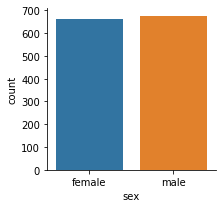

In [213]:
sns.catplot(x="sex",kind="count",data=df,height=3,aspect=1)

INSIGHTS:
No signicant difference between number of males and female

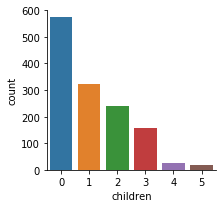

In [214]:
sns.catplot(x="children",kind="count",data=df,height=3,aspect=1)

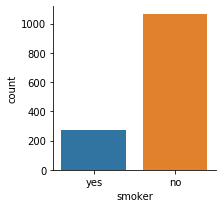

In [215]:
sns.catplot(x="smoker",kind="count",data=df,height=3,aspect=1)

INSIGHTS:
    
Number of non smokers who opted for insurance is more than that of the smokers

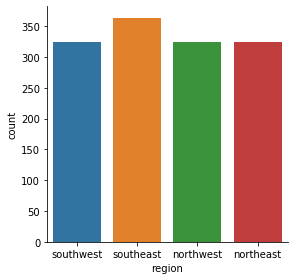

In [216]:
region=sns.catplot(x="region",kind="count",data=df,height=4,aspect=1)

INSIGHTS:
    
No significant difference between number of people who opted for insurance based on region

i. Pair plot that includes all the columns of the dataframe


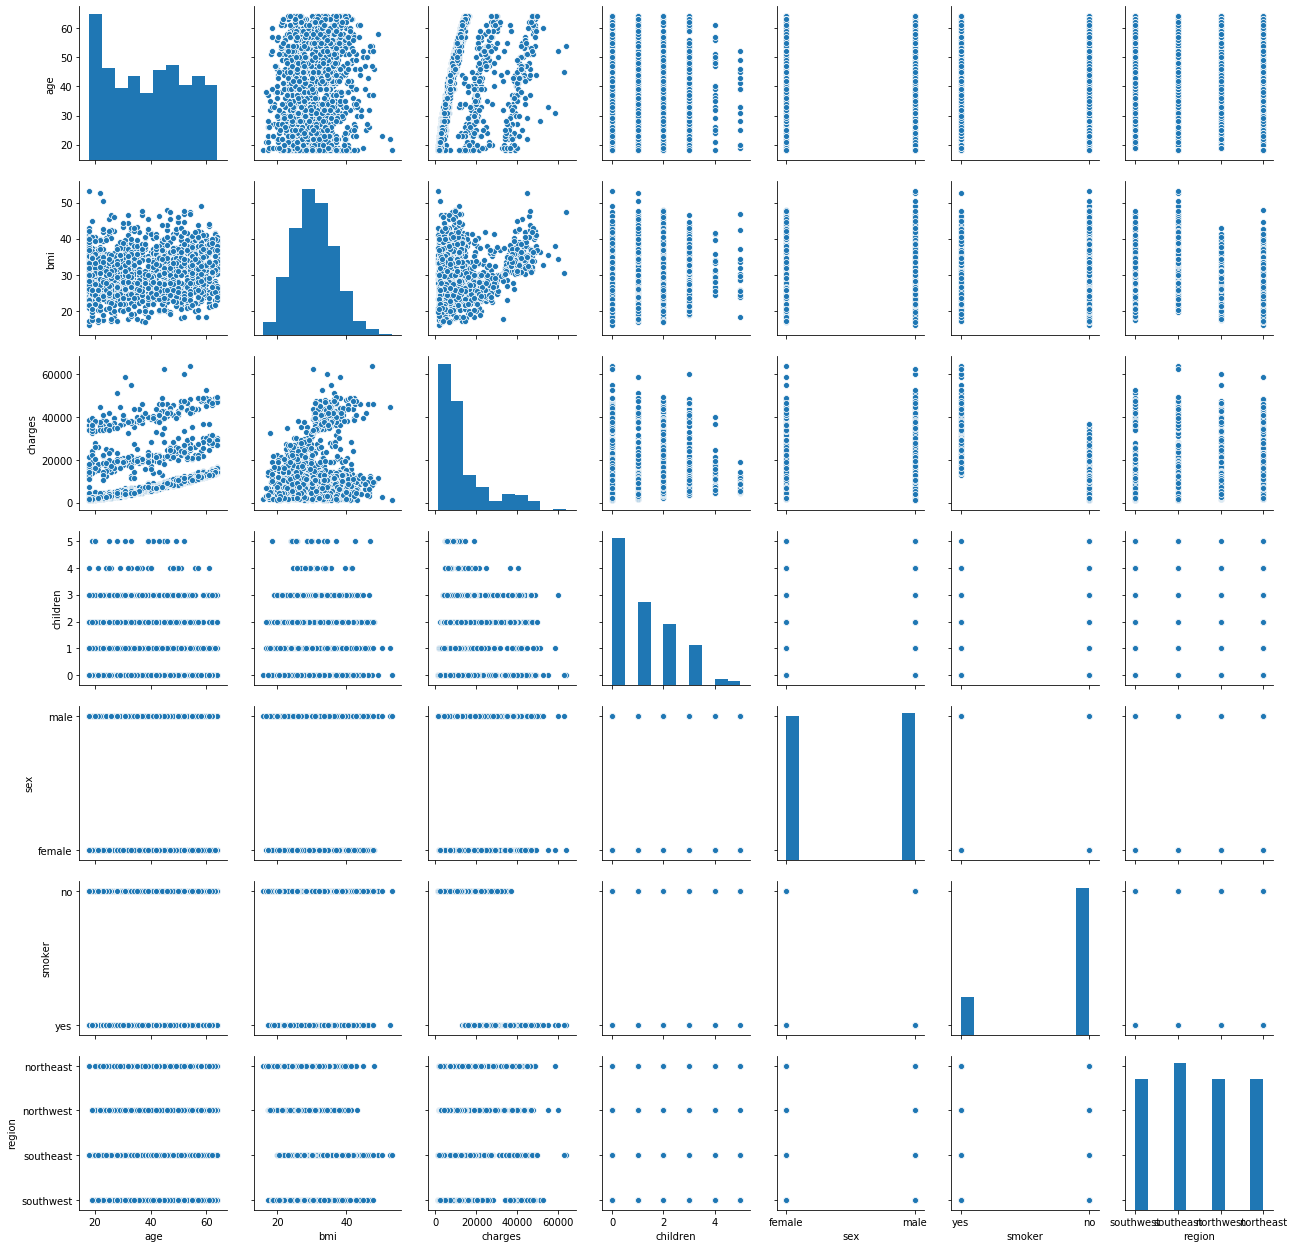

In [217]:
# PAIRPLOT THAT INCLUDES ALL COLUMNS INCLUDING CATEGORICAL VARIABLES
sns.pairplot(df,vars=['age','bmi','charges','children','sex','smoker','region'])

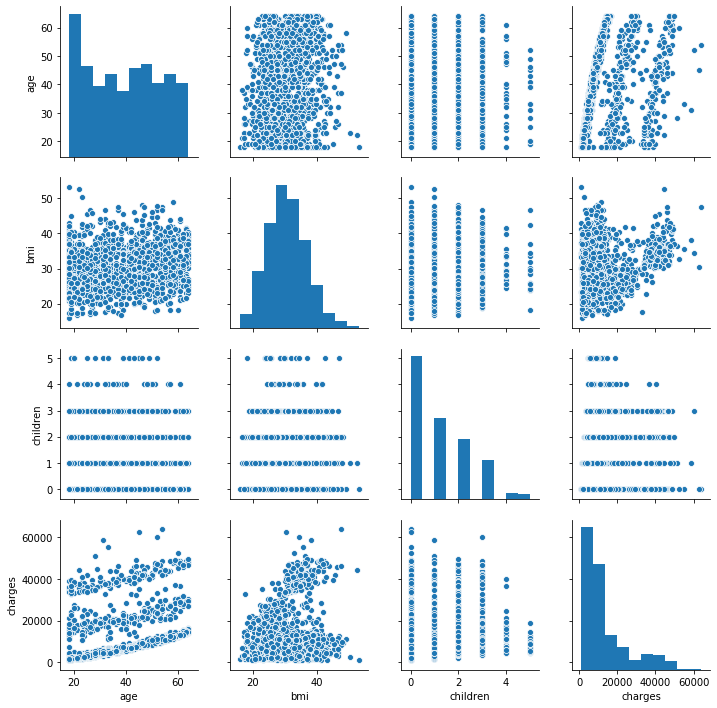

In [218]:
#STANDARD PAIRPLOT THAT CONTAINS ONLY NUMERICAL COLUMNS
sns.pairplot(df)

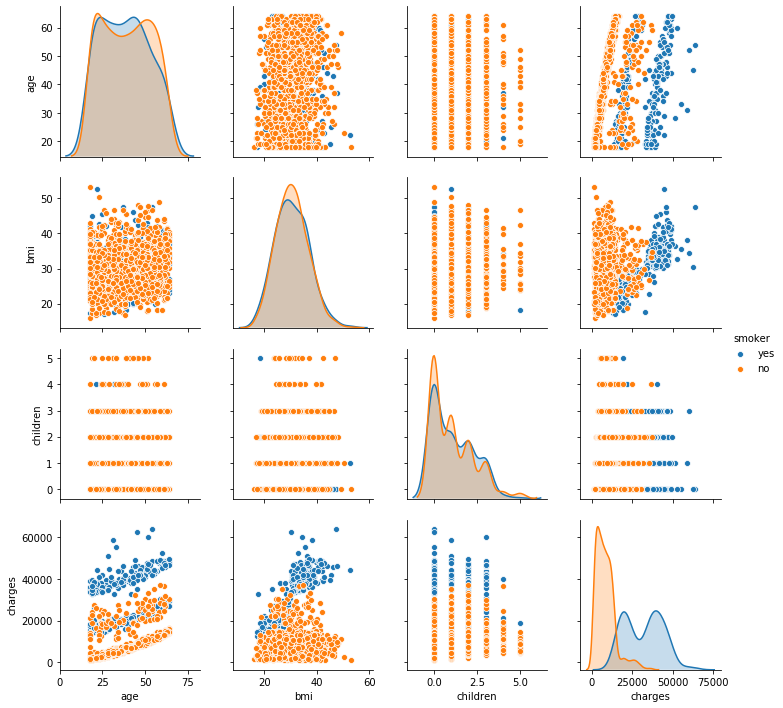

In [219]:
#PAIRPLOT showing data distribution between all numerical variables and a categorical variable(smoker) 
sns.pairplot(df,hue='smoker')

INSIGHTS:

Clearly the charges for smokers are more than that of non smokers

# 4. Answer the following questions with statistical evidence

a. Do charges of people who smoke differ significantly from the people who don't?

In [220]:
smokers_df=df[df["smoker"].str.contains('yes')]
nonsmokers_df=df[df["smoker"].str.contains('no')]

In [221]:
smokers_charges=smokers_df["charges"]
nonsmokers_charges=nonsmokers_df["charges"]

In [222]:
stats.ttest_ind(smokers_charges,nonsmokers_charges)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

THERE IS A SIGNIFICANT CHANGE IN CHARGES OF SMOKERS AND NONSMOKERS. SMOKERS PAY SIGNIFICANTLY MORE CHARGES THAN NON SMOKERS as level of significance is less than 5%

b. Does bmi of males differ significantly from that of females?

In [223]:
male_df=df[df["sex"].str.match('male')]
female_df=df[df["sex"].str.match('female')]

In [224]:
male_bmi=male_df["bmi"]
female_bmi=female_df["bmi"]

In [225]:
stats.ttest_ind(male_bmi,female_bmi)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

THERE IS NO SIGNIFICANT DIFFERENCE BETWEEN BMI OF MALE AND FEMALE AS P VALUE(8.99%) IS GREATER THAN LEVEL OF SIGNIFICANCE 5%

c. Is the proportion of smokers significantly different in different genders?


In [226]:
#EDA
male_smokers=male_df[male_df["smoker"].str.match('yes')]
male_nonsmokers=male_df[male_df["smoker"].str.match('no')]
male_smoker_proportion=male_smokers.shape[0]/male_nonsmokers.shape[0]
male_smoker_proportion

0.30754352030947774

In [227]:
#EDA
female_smokers=female_df[female_df["smoker"].str.match('yes')]
female_nonsmokers=female_df[female_df["smoker"].str.match('no')]
female_smoker_proportion=female_smokers.shape[0]/female_nonsmokers.shape[0]
female_smoker_proportion

0.21023765996343693

In [251]:
male_smoke_value=male_df["smoker"].str.match('yes').values
female_smoke_value=female_df["smoker"].str.match('yes').values

In [252]:
stats.ttest_ind(male_smoke_value,female_smoke_value)

Ttest_indResult(statistic=2.7927732701230927, pvalue=0.005300369127374036)

There is no significant difference between proportion of smokers in different genders as p-value(5.3%)> level of significance(5%)

d. Is the distribution of bmi across women with no children, one child and two children, the same ?


In [253]:
bmi_no_child=female_df[female_df["children"].values==0]["bmi"].values
bmi_one_child=female_df[female_df["children"].values==1]["bmi"].values
bmi_two_child=female_df[female_df["children"].values==2]["bmi"].values

In [254]:
stats.levene(bmi_no_child,bmi_one_child,bmi_two_child)

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

p value is > 5%(level of significance). Test of variance is satisfied and hence we can depend on the result of anova

In [255]:
stats.f_oneway(bmi_no_child,bmi_one_child,bmi_two_child)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

The distribution of bmi across women with no children, one child and two children are same as p value (71.5%) is greater than level of significance (5%)